# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test for Stationarity

(Sourced from: https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/)

KPSS test is a statistical (unit root) test to check for stationarity of a series around a deterministic trend. Like ADF test, the KPSS test is also commonly used to analyse the stationarity of a series. However, it has couple of key differences compared to the ADF test in function and in practical usage. Therefore, is not safe to just use them interchangeably. 



## Unit Root Tests

The KPSS test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.

Unit root is a characteristic of a time series that makes it non-stationary. Technically speaking, a unit root is said to exist in a time series of the value of alpha = 1 in the below equation.

$Y_{t} = \alpha Y_{t-1} + \beta X_{e} + \epsilon$

where, $Y_t$ is the value of the time series at time $t$ and $X_e$ is an exogenous variable (a separate explanatory variable, which is also a time series).

**The presence of a unit root means the time series is non-stationary.** Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

## KPSS vs ADF Test

A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.

**What that effectively means to us is, the test may not necessarily reject the null hypothesis (that the series is stationary) even if a series is steadily increasing or decreasing.**

But what is a ‘deterministic trend’?

The word ‘deterministic’ implies the slope of the trend in the series does not change permanently. That is, even if the series goes through a shock, it tends to regain its original path.

## KPSS Test in Python

In python, the `statsmodels` package provides a convenient implementation of the KPSS test.

**A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.** So practically, the interpretaion of p-value is just the opposite to each other. That is, if p-value is < signif level (say 0.05), then the series is non-stationary. Whereas in ADF test, it would mean the tested series is stationary.

To implement the KPSS test, we’ll use the `kpss` function from the `statsmodels` library. 

The output of the KPSS test contains 4 things:

- The KPSS statistic
- p-value
- Number of lags used by the test
- Critical values

The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.

The KPSS statistic is the actual test statistic that is computed while performing the test.

**In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.**

That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

The number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the `statsmodels kpss()` uses the ‘legacy’ method. In `legacy` method, `int(12 * (n / 100)**(1 / 4))` number of lags is included, where n is the length of the series.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels. tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Example 1: *Non-stationary* around constant

This dataset contains the minimum daily temperature of the Melbourne city from 1981 to 1990.

In [2]:
# load data
url = 'https://raw.githubusercontent.com/selva86/datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
series = df.loc[:, "Temp"].values
series

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

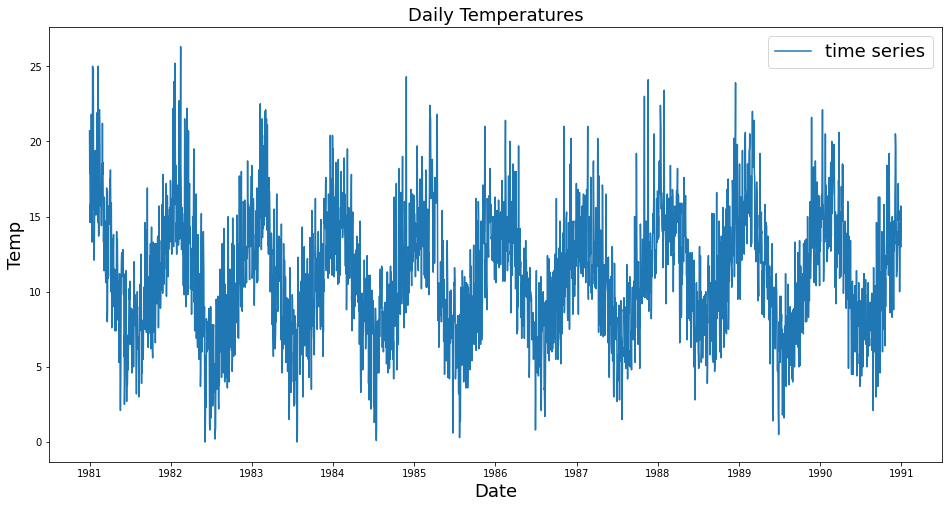

In [3]:
# plot
plt.figure(figsize=(16,8))
plt.plot(df.index, df.loc[:, "Temp"], label="time series")
plt.title("Daily Temperatures", fontsize=18)
plt.legend(fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Temp", fontsize=18)
plt.show()

### KPSS Test: Stationarity around constant ($H_0$: stationary)

In [4]:
# KPSS test around constant
result_kpss_c = kpss(series, regression="c")

statistic = result_kpss_c[0]
p_value = result_kpss_c[1]
n_lags = result_kpss_c[2]
critical_values = result_kpss_c[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a constant')

 > Is the data stationary ?
KPSS Statistic: 0.06511041909758424
p-value: 0.1
num lags: 30
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely stationary around a constant


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### KPSS Test: Stationarity around trend ($H_0$: stationary)

In [5]:
# KPSS test around trend
result_kpss_ct = kpss(series, regression="ct")

statistic = result_kpss_ct[0]
p_value = result_kpss_ct[1]
n_lags = result_kpss_ct[2]
critical_values = result_kpss_ct[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a trend')

 > Is the data stationary ?
KPSS Statistic: 0.05754274261642033
p-value: 0.1
num lags: 30
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely stationary around a trend


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### ADF Test: Stationarity in general ($H_0$: non-stationary)

In [6]:
# ADF test 
result_adf = adfuller(series, autolag="AIC")

statistic = result_adf[0]
p_value = result_adf[1]
used_lag = result_adf[2]
nobs = result_adf[3]
critical_values = result_adf[4]
icbest = result_adf[5]

print(" > Is the data stationary ?")
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {used_lag}')
print('Critial Values:')

for key, value in critical_values.items():
    print(f'   {key}, {value}')  

print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')

 > Is the data stationary ?
ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
num lags: 20
Critial Values:
   1%, -3.4321532327220154
   5%, -2.862336767636517
   10%, -2.56719413172842

Result: The series is likely stationary


## Example 2: *stationary* around trend

In [7]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/livestock.csv"
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, "value"].values
series

array([232.288994, 229.536258, 233.145936, 243.763684, 252.602916,
       259.677371, 260.766892, 269.784084, 266.414974, 263.917747,
       268.307222, 260.662556, 266.639419, 277.515778, 283.834045,
       290.309028, 292.474198, 300.830694, 309.286657, 318.331081,
       329.37239 , 338.883998, 339.244126, 328.600632, 314.255385,
       314.459695, 321.413779, 329.789292, 346.385165, 352.297882,
       348.370515, 417.562922, 417.12357 , 417.749459, 412.233904,
       411.946817, 394.697075, 401.49927 , 408.270468, 414.2428  ,
       407.997978, 403.460832, 413.824928, 428.104959, 445.338742,
       452.994173, 455.74017 ])

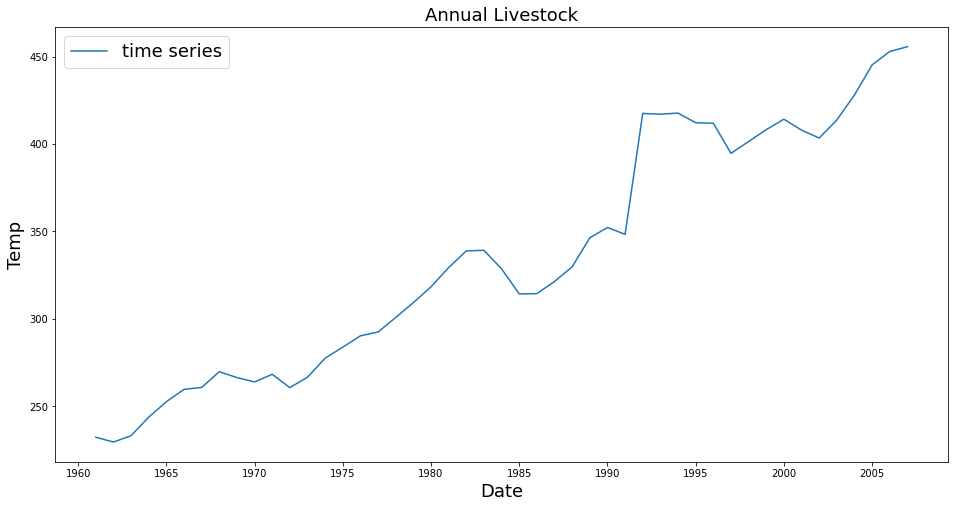

In [8]:
# plot
plt.figure(figsize=(16,8))
plt.plot(df.index, df.loc[:, "value"], label="time series")
plt.title("Annual Livestock", fontsize=18)
plt.legend(fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Temp", fontsize=18)
plt.show()

There appears to be a steady increasing trend overall. So, you could expect that this series is stationary around the trend.

Lets see...

### KPSS Test: Stationarity around constant ($H_0$: stationary)

In [9]:
# KPSS test around constant
result_kpss_c = kpss(series, regression="c")

statistic = result_kpss_c[0]
p_value = result_kpss_c[1]
n_lags = result_kpss_c[2]
critical_values = result_kpss_c[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a constant')

 > Is the data stationary ?
KPSS Statistic: 0.5488001951803195
p-value: 0.030675631716144246
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

Result: The series is likely not stationary around a constant


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


### KPSS Test: Stationarity around trend ($H_0$: stationary)

In [10]:
# KPSS test around trend
result_kpss_ct = kpss(series, regression="ct")

statistic = result_kpss_ct[0]
p_value = result_kpss_ct[1]
n_lags = result_kpss_ct[2]
critical_values = result_kpss_ct[3]

print(" > Is the data stationary ?")
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')

for key, value in critical_values.items():
  print(f'   {key} : {value}')
  
print(f'\nResult: The series is likely {"not " if p_value < 0.05 else ""}stationary around a trend')

 > Is the data stationary ?
KPSS Statistic: 0.11743798430485865
p-value: 0.1
num lags: 10
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216

Result: The series is likely stationary around a trend


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### ADF Test: Stationarity in general ($H_0$: non-stationary)

In [11]:
# ADF test 
result_adf = adfuller(series, autolag="AIC")

statistic = result_adf[0]
p_value = result_adf[1]
used_lag = result_adf[2]
nobs = result_adf[3]
critical_values = result_adf[4]
icbest = result_adf[5]

print(" > Is the data stationary ?")
print(f'ADF Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {used_lag}')
print('Critial Values:')

for key, value in critical_values.items():
    print(f'   {key}, {value}')  

print(f'\nResult: The series is likely {"not " if p_value > 0.05 else ""}stationary')

 > Is the data stationary ?
ADF Statistic: -0.2383837252991
p-value: 0.9337890318823667
num lags: 0
Critial Values:
   1%, -3.5812576580093696
   5%, -2.9267849124681518
   10%, -2.6015409829867675

Result: The series is likely not stationary


Since p-value is well above the 0.05 alpha level, you cannot reject the null hypothesis. So the series is NOT stationary according to ADF test, which is actually expected.

So overall what this means to us is, if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.